In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data      # shape (150, 4)
y = iris.target    # shape (150,)
print(iris.feature_names, iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

In [4]:
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [5]:
y_pred = model.predict(X_test)

In [6]:
print("Predictions:", y_pred[:5])
print("True labels:", y_test[:5])

Predictions: [1 0 2 1 1]
True labels: [1 0 2 1 1]


In [7]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [8]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print("k-NN accuracy:", accuracy_score(y_test, y_pred2))

k-NN accuracy: 1.0


In [9]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Decision Tree CV accuracy: 0.93 ± 0.06
k-NN CV accuracy: 0.93 ± 0.06
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

k-NN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



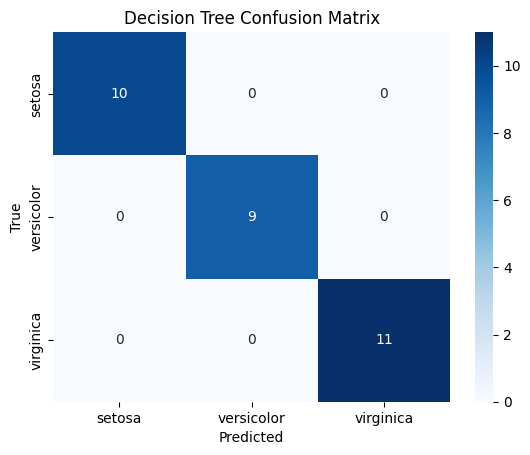

In [12]:
# Feature scaling for k-NN and other models
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cross-validation for Decision Tree and k-NN
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=42), X_train, y_train, cv=5)
knn_scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train_scaled, y_train, cv=5)

print("Decision Tree CV accuracy: {:.2f} ± {:.2f}".format(dt_scores.mean(), dt_scores.std()))
print("k-NN CV accuracy: {:.2f} ± {:.2f}".format(knn_scores.mean(), knn_scores.std()))

# Classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Decision Tree predictions
y_pred_dt = model.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# k-NN predictions (on scaled data)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)
print("k-NN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion matrix for Decision Tree
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']
Predictions: [1 0 2 1 1]
True labels: [1 0 2 1 1]
Accuracy: 1.0
k-NN accuracy: 1.0
Decision Tree CV accuracy: 0.93 ± 0.06
k-NN CV accuracy: 0.93 ± 0.06
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

k-NN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro 

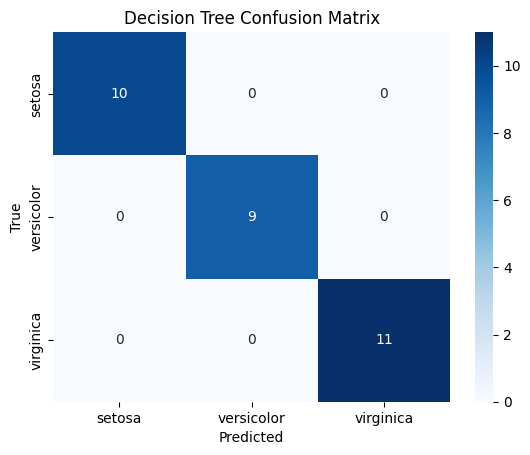

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data      # shape (150, 4)
y = iris.target    # shape (150,)
print(iris.feature_names, iris.target_names)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predictions:", y_pred[:5])
print("True labels:", y_test[:5])
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print("k-NN accuracy:", accuracy_score(y_test, y_pred2))
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)
# Feature scaling for k-NN and other models
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cross-validation for Decision Tree and k-NN
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=42), X_train, y_train, cv=5)
knn_scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train_scaled, y_train, cv=5)

print("Decision Tree CV accuracy: {:.2f} ± {:.2f}".format(dt_scores.mean(), dt_scores.std()))
print("k-NN CV accuracy: {:.2f} ± {:.2f}".format(knn_scores.mean(), knn_scores.std()))

# Classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Decision Tree predictions
y_pred_dt = model.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# k-NN predictions (on scaled data)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)
print("k-NN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion matrix for Decision Tree
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Decision Tree accuracy: 1.0
k-NN accuracy: 1.0
Decision Tree CV accuracy: 0.93 ± 0.06
k-NN CV accuracy: 0.93 ± 0.06
Decision Tree Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

k-NN Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg    

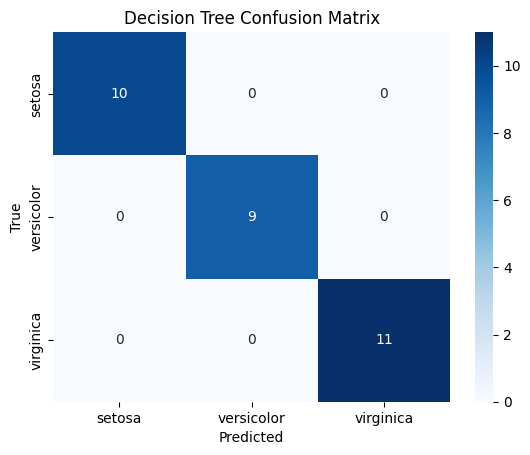

In [15]:
# Load the Iris dataset and show feature/target names
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data      # shape (150, 4)
y = iris.target    # shape (150,)
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train a k-NN (with scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# Accuracy scores
from sklearn.metrics import accuracy_score
print("Decision Tree accuracy:", accuracy_score(y_test, y_pred_dt))
print("k-NN accuracy:", accuracy_score(y_test, y_pred_knn))

# Cross-validation
from sklearn.model_selection import cross_val_score
dt_scores = cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=42), X_train, y_train, cv=5)
knn_scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train_scaled, y_train, cv=5)
print("Decision Tree CV accuracy: {:.2f} ± {:.2f}".format(dt_scores.mean(), dt_scores.std()))
print("k-NN CV accuracy: {:.2f} ± {:.2f}".format(knn_scores.mean(), knn_scores.std()))

# Classification reports
from sklearn.metrics import classification_report, confusion_matrix
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt, target_names=iris.target_names))
print("k-NN Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=iris.target_names))

# Confusion matrix for Decision Tree
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Decision Tree accuracy: 1.0
k-NN accuracy: 0.9666666666666667
Decision Tree CV accuracy: 0.94 ± 0.04
k-NN CV accuracy: 0.96 ± 0.03
Decision Tree Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

k-NN Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
 

Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

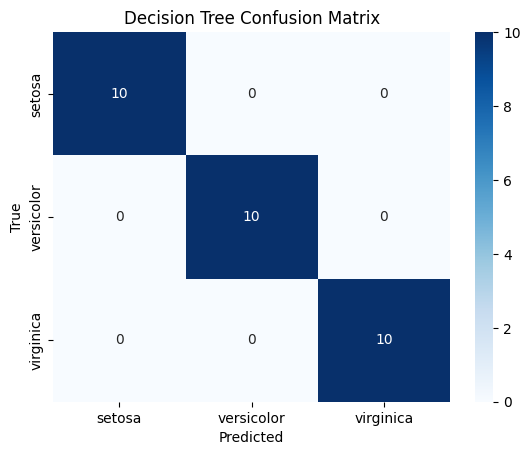

In [18]:
# Load the Iris dataset and show feature/target names
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
X = iris.data      # shape (150, 4)
y = iris.target    # shape (150,)
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

# Shuffle and split the data differently each time
from sklearn.model_selection import train_test_split
random_state = np.random.randint(0, 10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Train a Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train a k-NN (with scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# Accuracy scores
from sklearn.metrics import accuracy_score
print("Decision Tree accuracy:", accuracy_score(y_test, y_pred_dt))
print("k-NN accuracy:", accuracy_score(y_test, y_pred_knn))

# Cross-validation
from sklearn.model_selection import cross_val_score
dt_scores = cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=42), X_train, y_train, cv=5)
knn_scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train_scaled, y_train, cv=5)
print("Decision Tree CV accuracy: {:.2f} ± {:.2f}".format(dt_scores.mean(), dt_scores.std()))
print("k-NN CV accuracy: {:.2f} ± {:.2f}".format(knn_scores.mean(), knn_scores.std()))

# Classification reports
from sklearn.metrics import classification_report, confusion_matrix
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt, target_names=iris.target_names))
print("k-NN Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=iris.target_names))

# Confusion matrix for Decision Tree
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')